## Introduction to Deltaic Vegetation Hydrodynamics

Marsh land loss is a massive problem in coastal areas, including Louisiana, which experiences football fields of land loss every year due to rising sea levels! The [Louisiana Coastal Master Plan](https://coastal.la.gov/wp-content/uploads/2023/06/230531_CPRA_MP_Final-for-web_spreads.pdf) describes the different strategies that can be implemented to curb land loss. One of the major strategies is vegetation planting. But how does vegetation protect coastal communities? In this jupyter notebook, we will walk you through a modeling exercise exploring the impact of vegetation on land growth in deltaic wetlands

<figure> 
<img src="https://coastal.la.gov/wp-content/uploads/2013/03/1_Future-Without-Action-simple-768x301.jpg" width="800"/>
</figure>
(Louisiana Coastal Master Plan, 2023)
<br>
<br>
This figure shows the project land loss and land gain under a medium scenario of sea level rise. What are the green areas? Is there anything unique about their locations or inputs that would make those areas have land gains?

The green areas are examples of growing deltas! Deltas are prograding coastal environments where sediments deposit into a basin. The river network that connects roughly 50% of the contiguous United States drains out into the Gulf of Mexico via the Mississippi River and forms the Mississippi River delta, which makes up the entire coast of Louisiana. The sediment deposition from the river allows for land to be built as it stacks up eventually to the depth of the water, creating new land. Global sea level rise from climate change as well as sediment compaction over time causes land loss that only sediment retention can combat. The key to coastal preservation is maintaining sediment within the basin, which is the driver behind the different projects funded in the Coastal Master Plan.

#### *Question: What are the different strategies outlined in the Louisiana Coastal Master Plan, and how does each strategy promote land growth?*


Vegetation induces drag on a flow. Simply put, the resistance of the vegetation to the water velocity causes the water velocity to slow. The following conceptual diagrams show the impact of the vegetation both vertically through the water column and spatially in a network. The velocity decreases as the density of vegetation increases vertically in the water column, the drag coefficient is affected. The flow is preferentially routed around the stems spatially. In a deltaic system that consists of islands and channels, the preferential flow routing creates systemic changes to the system.

<figure>
<img src="image.png" width="300"/>
</figure>
(Nepf and Vivoni 2000)

<figure>
<img src="https://agupubs.onlinelibrary.wiley.com/cms/asset/565ab474-3e08-4af0-9077-bad4473a4e21/wrcr21387-fig-0009-m.jpg" width="500"/>
</figure>
(Hiatt and Passalacqua 2015)

## Overview of PyDeltaRCM

*pyDeltaRCM* is a computationally efficient, free and open source, and easy-to-customize numerical delta model based on the original DeltaRCM model design ([MATLAB deltaRCM model](https://csdms.colorado.edu/wiki/Model:DeltaRCM) by Man Liang; [Liang et al., 2015](https://doi.org/10.5194/esurf-3-67-2015)). *pyDeltaRCM* delivers improved model stability and capabilities, infrastructure to support exploration with minimal boilerplate code, and establishes an approach to extending model capabilities that ensures reproducible and comparable studies. It is a  reduced-complexity model (RCM), different from the process-based morphodynamic models based on detailed computational fluid dynamics by employing stochastic parcel-based cellular routing schemes for water and sediment transport. The model requires different parameters and variables as input including topography, flow discharge, bed roughness and produces outputs including depth-averaged flow field, water surface elevation and evolving bed topography. 

<figure>
<img src="https://camo.githubusercontent.com/ba2473d4bf88934403a15a7bbba476b37a1b36be16d224384fb6182dca29c844/68747470733a2f2f64656c746172636d2e6f72672f707944656c746152434d2f5f696d616765732f636f7665722e706e67" width="500"/>
<figcaption> Figure:  Weighted random walks for 20 water parcels </figcaption>
</figure>

To capture the evolution of vegetation in delta development we are going to use an impletation of a vegtation model developed by Lauzon and Murray (2018) built on top of `pyDeltaRCM` using `VegetationModel.py`




References
----------
* Moodie et al., (2021). pyDeltaRCM: a flexible numerical delta model. Journal of Open Source Software, 6(64), 3398, https://doi.org/10.21105/joss.03398
* Lauzon, R., & Murray, A. B. (2018). Comparing the cohesive effects of mud and vegetation on delta evolution. Geophysical Research Letters, 45, 10437–10445. https://doi.org/10.1029/2018GL079405
* Hiatt, M., & Passalacqua, P. (2016). Water Resources Research. Water Resources Research, 5(3), 2–2. https://doi.org/10.1111/j.1752-1688.1969.tb04897.x
* Coastal Protection and Restoration Authority of Louisiana. 2023. Louisiana’s Comprehensive Master Plan for a Sustainable Coast. Coastal Protection and Restoration Authority of Louisiana. Baton Rouge, LA.
* Nepf, H. M., & Vivoni, E. R. (2000). Flow structure in depth‐limited, vegetated flow. Journal of Geophysical Research: Oceans, 105(C12), 28547-28557.

<br>

---

<br>

We begin by importing necessary packages to run our models and display our results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pyDeltaRCM
from VegetationModel import VegetationModel
import xarray as xr
import deltametrics as dm
from IPython.display import clear_output
from IPython.display import Image

We begin by instatiating our model using the parameters provided in our YAML configuration file. Note that `vegetation` parameter can be set to *True* or *False* to implement the vegetation growth function in `VegetationModel.py`. We first set this parameter to *False* to create a model using no vegetation.

In [2]:
# create a simulated delta model
delta_noveg = VegetationModel(
    input_file='./vegetation.yaml',
    out_dir='./no_vegetation_output',
    save_checkpoint=True,
    save_dt=86400,
    clobber_netcdf=True,
    vegetation=False, #change to turn vegetation on or off
    save_veg_frac_figs = True,
    )

/opt/tljh/user/envs/ivy/lib/python3.11/site-packages/pyDeltaRCM/init_tools.py:626: UserWarning: Replacing existing netCDF file
  warnings.warn(UserWarning(_msg))


Time: 0.0; timestep: 0


Now that we have instatiated the model we can run the model. The delta model is run forward with a call to the `update()` method. So, we simply create a for loop, and call the update function, and then wrap everything up with a call to `finalize()` the model. The range defines the number of timesteps the model runs for. You can experiment by increasing or decreasing the number of timesteps to see how it impacts the final model:

In [3]:
for i in range(1000):
    delta_noveg.update()
delta_noveg.finalize()

Time: 13636.4; timestep: 1
Time: 27272.7; timestep: 2
Time: 40909.1; timestep: 3
Time: 54545.5; timestep: 4
Time: 68181.8; timestep: 5
Time: 81818.2; timestep: 6
Time: 95454.5; timestep: 7
Time: 109090.9; timestep: 8
Time: 122727.3; timestep: 9
Time: 136363.6; timestep: 10
Time: 150000.0; timestep: 11
Time: 163636.4; timestep: 12
Time: 177272.7; timestep: 13
Time: 190909.1; timestep: 14
Time: 204545.5; timestep: 15
Time: 218181.8; timestep: 16
Time: 231818.2; timestep: 17
Time: 245454.5; timestep: 18
Time: 259090.9; timestep: 19
Time: 272727.3; timestep: 20
Time: 286363.6; timestep: 21
Time: 300000.0; timestep: 22
Time: 313636.4; timestep: 23
Time: 327272.7; timestep: 24
Time: 340909.1; timestep: 25
Time: 354545.5; timestep: 26
Time: 368181.8; timestep: 27
Time: 381818.2; timestep: 28
Time: 395454.5; timestep: 29
Time: 409090.9; timestep: 30
Time: 422727.3; timestep: 31
Time: 436363.6; timestep: 32
Time: 450000.0; timestep: 33
Time: 463636.4; timestep: 34
Time: 477272.7; timestep: 35
T

Our model has finished running! Now we can import in the results and begin to visualize our results:

In [4]:
data = xr.open_dataset('./no_vegetation_output/pyDeltaRCM_output.nc')
data['eta'].shape
extent = [
    np.min(data.coords['y']),
    np.max(data.coords['y']),
    np.min(data.coords['x']),
    np.max(data.coords['x'])
]

In [5]:
def update_field(i):
    im.set_data(data['eta'][i, :, :]+0.01)
    vegi = data['veg_frac'][i, :, :]
    veg_alpha = 0.6 * (vegi > 0.01).astype(float)
    vegim.set_data(vegi)
    vegim.set_alpha(veg_alpha)

In [6]:
time_idxs = np.arange(0, data['time'].shape[0]-1)
cmap, norm = dm.plot.cartographic_colormap(H_SL=0.0, h=4.5, n=1.0)
fig, ax = plt.subplots(
    gridspec_kw=dict(left=0.1, right=0.9)
)
im = ax.imshow(
    data['eta'][0, :, :],
    extent=extent,
    cmap=cmap, norm=norm
    )
veg0 = data['veg_frac'][0, :, :]
veg_alpha = (veg0 > 0.01).astype(float)
vegim = ax.imshow(
    veg0,
    extent=extent,
    cmap='Oranges', vmin=0, vmax=0.2,  # hardcoded max for colorbar at veg_frac = 0.2
    alpha=veg_alpha
    )
cb0 = plt.colorbar(im, shrink=0.45, label='elevation [m]')
cb1 = plt.colorbar(vegim, shrink=0.45, label='vegetation frac [-]')
plt.savefig('initial_frame.png', dpi = 300)
anim = animation.FuncAnimation(
    fig, update_field,
    frames=data['eta'].shape[0]-1)
anim.save('simple_no_veg_movie.gif', fps=20)
plt.close()

/home/jupyter-skarimaghaei@utexa-afc67/.local/lib/python3.11/site-packages/deltametrics/plot.py:566: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = matplotlib.cm.get_cmap('Blues_r', 64)
/home/jupyter-skarimaghaei@utexa-afc67/.local/lib/python3.11/site-packages/deltametrics/plot.py:567: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  greens = matplotlib.cm.get_cmap('YlGn_r', 64)
MovieWriter ffmpeg unavailable; using Pillow instead.


Let's load in our gif that shows how the model is evolving over time! Our plot shows both the evolution of bed elevation and vegetation growth. Do we see any vegetation growth in this case?

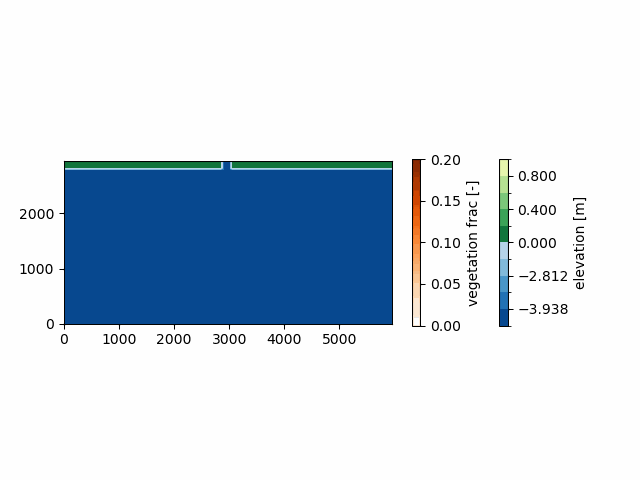

In [7]:
Image(filename='simple_no_veg_movie.gif')

Now let's explore how adding vegetation changes how the delta evolves through time. We can instantiate a new model and set the `vegetation` parameter to *True*:

In [8]:
delta_veg = VegetationModel(
    input_file='./vegetation.yaml',
    out_dir='./vegetation_output',
    save_checkpoint=True,
    save_dt=86400,
    clobber_netcdf=True,
    vegetation=True, 
    save_veg_frac_figs = True,
    )

Time: 0.0; timestep: 0


/opt/tljh/user/envs/ivy/lib/python3.11/site-packages/pyDeltaRCM/init_tools.py:626: UserWarning: Replacing existing netCDF file
  warnings.warn(UserWarning(_msg))


Now, we can run the model for the vegetated case and create the plot just as we did before:

In [9]:
for i in range(1000):
    delta_veg.update()
delta_veg.finalize()

Time: 13636.4; timestep: 1
Time: 27272.7; timestep: 2
Time: 40909.1; timestep: 3
Time: 54545.5; timestep: 4
Time: 68181.8; timestep: 5
Time: 81818.2; timestep: 6
Time: 95454.5; timestep: 7
Time: 109090.9; timestep: 8
Time: 122727.3; timestep: 9
Time: 136363.6; timestep: 10
Time: 150000.0; timestep: 11
Time: 163636.4; timestep: 12
Time: 177272.7; timestep: 13
Time: 190909.1; timestep: 14
Time: 204545.5; timestep: 15
Time: 218181.8; timestep: 16
Time: 231818.2; timestep: 17
Time: 245454.5; timestep: 18
Time: 259090.9; timestep: 19
Time: 272727.3; timestep: 20
Time: 286363.6; timestep: 21
Time: 300000.0; timestep: 22
Time: 313636.4; timestep: 23
Time: 327272.7; timestep: 24
Time: 340909.1; timestep: 25
Time: 354545.5; timestep: 26
Time: 368181.8; timestep: 27
Time: 381818.2; timestep: 28
Time: 395454.5; timestep: 29
Time: 409090.9; timestep: 30
Time: 422727.3; timestep: 31
Time: 436363.6; timestep: 32
Time: 450000.0; timestep: 33
Time: 463636.4; timestep: 34
Time: 477272.7; timestep: 35
T

In [10]:
data = xr.open_dataset('./vegetation_output/pyDeltaRCM_output.nc')
data['eta'].shape 
extent = [
    np.min(data.coords['y']),
    np.max(data.coords['y']),
    np.min(data.coords['x']),
    np.max(data.coords['x'])
]

In [11]:
time_idxs = np.arange(0, data['time'].shape[0]-1)
cmap, norm = dm.plot.cartographic_colormap(H_SL=0.0, h=4.5, n=1.0)
fig, ax = plt.subplots(
    gridspec_kw=dict(left=0.1, right=0.9)
)
im = ax.imshow(
    data['eta'][0, :, :],
    extent=extent,
    cmap=cmap, norm=norm
    )
veg0 = data['veg_frac'][0, :, :]
veg_alpha = (veg0 > 0.01).astype(float)
vegim = ax.imshow(
    veg0,
    extent=extent,
    cmap='Oranges', vmin=0, vmax=0.2,  # hardcoded max for colorbar at veg_frac = 0.2
    alpha=veg_alpha
    )
cb0 = plt.colorbar(im, shrink=0.45, label='elevation [m]')
cb1 = plt.colorbar(vegim, shrink=0.45, label='vegetation frac [-]')
plt.savefig('initial_frame.png', dpi = 300)
anim = animation.FuncAnimation(
    fig, update_field,
    frames=data['eta'].shape[0]-1)
anim.save('simple_veg_movie.gif', fps=20)
plt.close()

/home/jupyter-skarimaghaei@utexa-afc67/.local/lib/python3.11/site-packages/deltametrics/plot.py:566: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = matplotlib.cm.get_cmap('Blues_r', 64)
/home/jupyter-skarimaghaei@utexa-afc67/.local/lib/python3.11/site-packages/deltametrics/plot.py:567: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  greens = matplotlib.cm.get_cmap('YlGn_r', 64)
MovieWriter ffmpeg unavailable; using Pillow instead.


Let's take a look at how different the delta evolution looks like using the same input parameters as before but allowing for vegetation growth!

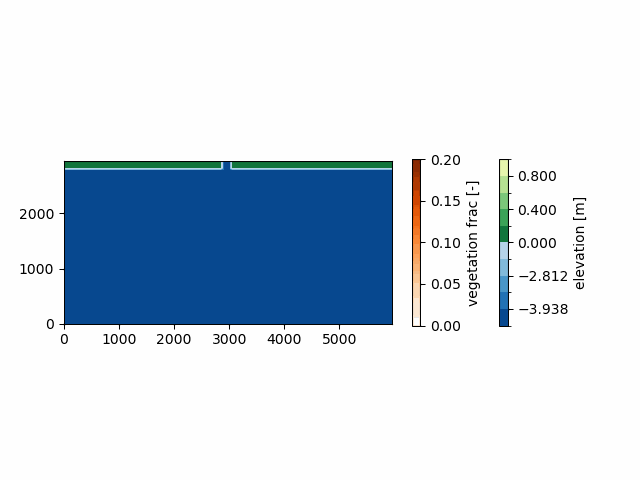

In [12]:
Image(filename='simple_veg_movie.gif')

We saw examples of delta growth with and without vegetation. What are the differences you noticed?